<a href="https://colab.research.google.com/github/WillianReinaG/pregunta-smart-icesi/blob/main/Copia_de_Taller_2_SQL_Emp_(Joins%2C_groupby).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<font color="red">*Para iniciar, cree su propia copia de este notebook. File> Save a Copy in Drive*</font>


---
<font color="green">
Ten en cuenta los siguientes pasos:
1.    

1.   Ve al menú "Archivo" en la esquina superior izquierda de la interfaz de Colab.
2.   Selecciona la opción "Guardar una copia en Drive" del menú desplegable. Esto creará una copia del cuaderno en tu propia cuenta de Google Drive.
3. Google Colab abrirá automáticamente la nueva copia del cuaderno, y verás que ahora está ubicado en tu Google Drive en la carpeta "Colab Notebooks".
4. Puedes editar y ejecutar esta copia del cuaderno como desees, y todos los cambios que hagas se guardarán en tu propia cuenta de Google Drive.

</font>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# SQL Programming - Joins y funciones de agregación
*Creado por : Mónica Rojas (Universidad Icesi)*

## 1.1 Objetivo
El objetivo de este taller es realizar operaciones de agregación con GROUP BY y consultas que involucran múltiples tablas mediante JOIN.


##Instrucciones:
1. Lea cuidadosamente la explicación.
2. Para ejecutar el código en una celda, puede hacer clic en el botón "Ejecutar" junto a la celda o simplemente presionar "Shift + Enter" en su teclado.

## 1.2 Conectando a nuestra base de datos
Correr la siguiente instrucción para cargar la extensión de sql en nuestro ambiente.

In [ ]:
# Lo primero que haremos será cargar una extensión de SQL en nuestro entorno
# Esta extensión nos permitirá trabajar con SQL en Colaboratory
#
%load_ext sql

# A continuación nos conectaremos a nuestra base de datos sqlite en memoria
# Nota: Esta base de datos dejará de existir tan pronto como se cierre la conexión a la base de datos
# Aprenderemos más sobre cómo se crean las bases de datos más adelante en la preparación
#
%sql sqlite://

## 1.3 Creando una tabla e inserción de datos
A continuación se pueden observar ejemplo de creación de tablas e inserción de datos, se pueden ejecutar para posteriormente realizar consultas sobre ellas.

Utilizaremos las mismas tablas del taller anterior.

Se realiza la creación de la tabla EMP (definición del esquema), con los siguientes atributos: número del empleado (EMPNO), nombre del empleado (ENAME), cargo (JOB), jefe (MGR), fecha de ingreso (HIREDATE), salario (SAL), comisiones (COMM) y número del departamento en el que trabaja (DEPTNO).

A continuación ejecute el comando para ver el resultado.


In [ ]:
# Example 1
# We will now define and create a table Emp in our database (if it doesn't exist).
# This table will have fields: empno, ename, job, mgr, hiredate,sal,comm and deptno
# We will insert example rows into the table and then get all the records in the table.
#
%%sql
--drop table emp;

CREATE TABLE if not exists EMP
       (EMPNO NUMBER(4) NOT NULL,
        ENAME VARCHAR2(10),
        JOB VARCHAR2(9),
        MGR NUMBER(4),
        HIREDATE DATE,
        SAL NUMBER(7, 2),
        COMM NUMBER(7, 2),
        DEPTNO NUMBER(2));

-- insertar datos en la tabla EMP
INSERT INTO EMP VALUES (7369, 'SMITH','CLERK',7902,'17-DEC-1980',  800,NULL, 20);
INSERT INTO EMP VALUES (7499, 'ALLEN', 'SALESMAN',7698, '20-FEB-1981', 1600,  300, 30);
INSERT INTO EMP VALUES (7521, 'WARD', 'SALESMAN', 7698, '22-FEB-1981', 1250, 500, 30);
INSERT INTO EMP VALUES (7566, 'JONES', 'MANAGER', 7839, '1981-04-02', 2975, NULL, 20);
INSERT INTO EMP VALUES (7654, 'MARTIN', 'SALESMAN', 7698, '1981-09-28', 1250, 1400, 30);
INSERT INTO EMP VALUES (7698, 'BLAKE', 'MANAGER', 7839, '1981-05-01', 2850, NULL, 30);
INSERT INTO EMP VALUES (7782, 'CLARK', 'MANAGER', 7839, '1981-06-09', 2450, NULL, 10);
INSERT INTO EMP VALUES (7788, 'SCOTT', 'ANALYST', 7566, '1982-12-09', 3000, NULL, 20);
INSERT INTO EMP VALUES (7839, 'KING', 'PRESIDENT', NULL, '1981-11-17', 5000, NULL, 10);
INSERT INTO EMP VALUES (7844, 'TURNER', 'SALESMAN', 7698, '1981-09-08', 1500, 0, 30);
INSERT INTO EMP VALUES (7876, 'ADAMS', 'CLERK', 7788, '1983-01-12', 1100, NULL, 20);
INSERT INTO EMP VALUES (7900, 'JAMES', 'CLERK', 7698, '1981-12-03', 950, NULL, 30);
INSERT INTO EMP VALUES (7902, 'FORD', 'ANALYST', 7566, '1981-12-03', 3000, NULL, 20);
INSERT INTO EMP VALUES (7934, 'MILLER', 'CLERK', 7782, '1982-01-23', 1300, NULL, 10);

-- mostrar los empleados

SELECT * From EMP;

 * sqlite://
Done.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
Done.


EMPNO,ENAME,JOB,MGR,HIREDATE,SAL,COMM,DEPTNO
7369,SMITH,CLERK,7902,17-DEC-1980,800,None,20
7499,ALLEN,SALESMAN,7698,20-FEB-1981,1600,300,30
7521,WARD,SALESMAN,7698,22-FEB-1981,1250,500,30
7566,JONES,MANAGER,7839,1981-04-02,2975,None,20
7654,MARTIN,SALESMAN,7698,1981-09-28,1250,1400,30
7698,BLAKE,MANAGER,7839,1981-05-01,2850,None,30
7782,CLARK,MANAGER,7839,1981-06-09,2450,None,10
7788,SCOTT,ANALYST,7566,1982-12-09,3000,None,20
7839,KING,PRESIDENT,None,1981-11-17,5000,None,10
7844,TURNER,SALESMAN,7698,1981-09-08,1500,0,30


Creación de la tabla DEPT, que tiene los atributos: número de departamento (DEPTNO), nombre (DNAME), y ubicación (LOC), con su respectiva definición.

Y se realizar la inserción de datos. A continuación ejecute el comando para ver lo realizado.

In [ ]:
# Ejemplo 2
# En este ejemplo, crearemos una tabla llamada DEPT
# con las columnas Deptno, dname y loc.
#
%%sql
CREATE TABLE if not exists DEPT
       (DEPTNO NUMBER(2),
        DNAME VARCHAR2(14),
        LOC VARCHAR2(13));

-- Insertar datos en la tabla DEPT
INSERT INTO DEPT VALUES (10, 'ACCOUNTING', 'NEW YORK');
INSERT INTO DEPT VALUES (20, 'RESEARCH',   'DALLAS');
INSERT INTO DEPT VALUES (30, 'SALES',      'CHICAGO');
INSERT INTO DEPT VALUES (40, 'OPERATIONS', 'BOSTON');

-- mostrar toda la información de los departamentos
SELECT * From DEPT;

 * sqlite://
Done.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
Done.


DEPTNO,DNAME,LOC
10,ACCOUNTING,NEW YORK
20,RESEARCH,DALLAS
30,SALES,CHICAGO
40,OPERATIONS,BOSTON


Creación de la tabla SALGRADE, que tiene los atributos: grado (GRADE), salario mínimo (losal), y salario máximo (hisal), con su respectiva definición.

Y se realiza la inserción de datos. A continuación ejecute el comando para ver lo realizado.

In [ ]:
# Ejemplo 2
# En este ejemplo, crearemos una tabla llamada SALGRADE
# con las columnas grade, losal y hisal.
#
%%sql
CREATE TABLE if not exists SALGRADE
      (GRADE NUMBER(2),
      LOSAL NUMBER(8),
      HISAL NUMBER(8));

-- Insertar datos en la tabla SALGRADE
INSERT INTO SALGRADE VALUES (1, 800, 1499.99);
INSERT INTO SALGRADE VALUES (2, 1500, 2499.99);
INSERT INTO SALGRADE VALUES (3, 2500, 4999.99);
INSERT INTO SALGRADE VALUES (4, 4500, 99999999);

-- mostrar toda la información de los grados salariales
SELECT * From SALGRADE;

 * sqlite://
Done.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
Done.


GRADE,LOSAL,HISAL
1,800,1499.99
2,1500,2499.99
3,2500,4999.99
4,4500,99999999


## 1.3 Consultas con varias tablas
Realizar las siguientes consultas, en cada una se presenta un pantallazo del resultado esperado, para que comparen sus resultados.

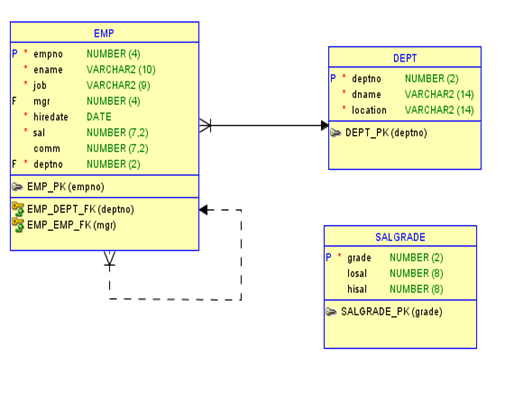

La cláusula `JOIN`en SQL se utiliza para combinar filas de dos o más tablas en función de una columna relacionada entre ellas. Esta operación se realiza para obtener información completa de múltiples tablas relacionadas en una sola consulta. El "`JOIN`" es fundamental cuando se trabaja con bases de datos relacionales, ya que permite vincular y extraer datos de manera efectiva de tablas que se relacionan entre sí.

* `INNER JOIN`: Combina filas de dos tablas en función de una columna de igualdad y devuelve solo las filas donde hay una coincidencia en ambas tablas. Si no hay coincidencia en la columna especificada, esas filas no se incluirán en el resultado.

> Sintaxis

```
SELECT columna1, columna2, ...
FROM tabla1 inner join tabla2 on tabla1.columna1 = tabla2.columna2;
```

* `NATURAL INNER JOIN`: similar al INNER JOIN, con la diferencia de que el join se realiza por la columnas con el mismo nombre en ambas tablas, deben tener el mismo tipo de datos para que la unión sea exitosa. El resultado incluirá solo los registros que tengan coincidencias en todas las columnas con el mismo nombre en ambas tablas.

> Sintaxis

```
SELECT columna1, columna2, ...
FROM tabla1 natural inner join tabla2;
```


Ej: Nombre del empleado con el nombre del departartamento en el que trabaja.


```
SELECT ename, dname
FROM dept d inner join emp e  on d.deptno = e.deptno;
```
> En este caso, es necesario utilizar un alias para el nombrado de las tablas (o usar el nombre completo de la tablas), porque el atributo tiene igual nombre  en ambas tablas.

```
SELECT ename, dname
FROM dept natural inner join;
```
> En este caso, como el nombre de la columna es deptno en ambas tablas, entonces se puede hacer natural inner join y no hay más columnas iguales en ambas tablas.

### **1) Seleccionar el número y nombre de los empleados con el nombre del departamento en el que trabajan.**

Tip: como se requieren datos de la tabla EMP y de la tabla DEPT, es necesario utilizar `JOIN`.  En este caso se utilizaría un `INNER JOIN`. Recuerde incluir la condición de unión de las tablas en la cláusula ON.

El resultado esperado es:

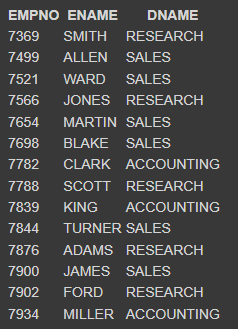

In [ ]:
# Consulta
# Seleccionar el número y nombre de los empleados con el nombre del departamento en el que trabajan.
#
%%sql

select *
from   ...

 * sqlite://
(sqlite3.OperationalError) near ".": syntax error
[SQL: select *
from   ...]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


#### Solución:

Puedes acudir a ella en caso de bloqueo.

In [ ]:
%%sql

SELECT empno, ename, dname
FROM EMP e INNER JOIN DEPT d
ON e.deptno = d.deptno;

UsageError: Cell magic `%%sql` not found.


### **2) Seleccionar los empleados del departamento 'SALES' que ganan más de 1500.**

**Tip**: al hacer un JOIN, si se quiere mostrar toda la información de una tabla se puede especificar:

 `SELECT EMP.*` para mostrar todos los atributos de la tabla EMP.

 El resultado esperado es:

 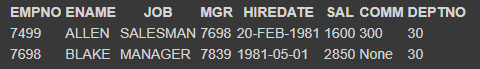

In [ ]:
# Consulta
# Seleccionar el número y nombre de los empleados con el nombre del departamento en el que trabajan.
#
%%sql

SELECT emp.*
FROM ...
WHERE ...

 * sqlite://
(sqlite3.OperationalError) near ".": syntax error
[SQL: SELECT emp.*
FROM ...
WHERE ...]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


#### Solución:

Puedes acudir a ella en caso de bloqueo.

In [ ]:
%%sql

SELECT
  e.*
FROM
  EMP e
INNER JOIN
  DEPT d ON e.deptno = d.deptno
WHERE
  d.dname = 'SALES' AND e.sal > 1500;

 * sqlite://
Done.


EMPNO,ENAME,JOB,MGR,HIREDATE,SAL,COMM,DEPTNO
7499,ALLEN,SALESMAN,7698,20-FEB-1981,1600,300,30
7698,BLAKE,MANAGER,7839,1981-05-01,2850,None,30


### **3)	Determinar el nombre de cada empleado junto con la diferencia de grado salarial existente con su jefe  (grado del jefe – grado del empleado)**

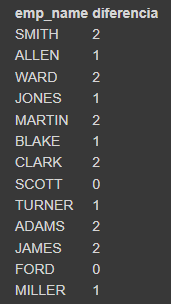


In [ ]:
# Consulta
# Determinar el nombre de cada empleado junto con la diferencia de grado salarial existente con su jefe
#(grado del jefe – grado del empleado)
#
%%sql


SELECT
FROM ...

 * sqlite://
(sqlite3.OperationalError) near "FROM": syntax error
[SQL: SELECT
FROM ...]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


#### Solución:

Puedes acudir a ella en caso de bloqueo.

In [ ]:
%%sql

SELECT
  e.ename AS emp_name,
  ms.grade - s.grade AS diferencia
FROM EMP E
JOIN SALGRADE S on e.sal BETWEEN s.losal AND s.hisal
JOIN EMP M ON e.mgr = m.empno
JOIN SALGRADE MS ON m.sal BETWEEN ms.losal AND ms.hisal;

 * sqlite://
Done.


emp_name,diferencia
SMITH,2
ALLEN,1
WARD,2
JONES,1
MARTIN,2
BLAKE,1
CLARK,2
SCOTT,0
TURNER,1
ADAMS,2


### **4) Seleccionar los números, nombres de los jefes junto con el nombre del departamento donde trabajan.**

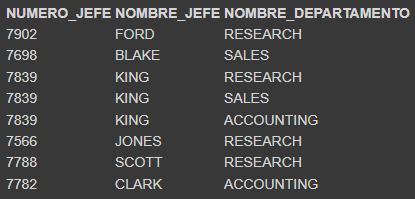

In [ ]:
# Consulta
# Seleccionar los números, nombres de los jefes junto con el nombre del departamento donde trabajan.
#
%%sql


SELECT
FROM ...

 * sqlite://
(sqlite3.OperationalError) near "FROM": syntax error
[SQL: SELECT
FROM ...]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


#### Solución:

Puedes acudir a ella en caso de bloqueo.

In [ ]:
%%sql

SELECT DISTINCT
  E.MGR AS NUMERO_JEFE,
  M.ENAME AS NOMBRE_JEFE,
  D.DNAME AS NOMBRE_DEPARTAMENTO
FROM EMP E
JOIN EMP M ON E.MGR = M.EMPNO
JOIN DEPT D ON E.DEPTNO = D.DEPTNO;

 * sqlite://
Done.


NUMERO_JEFE,NOMBRE_JEFE,NOMBRE_DEPARTAMENTO
7902,FORD,RESEARCH
7698,BLAKE,SALES
7839,KING,RESEARCH
7839,KING,SALES
7839,KING,ACCOUNTING
7566,JONES,RESEARCH
7788,SCOTT,RESEARCH
7782,CLARK,ACCOUNTING


## 1.4 Consultas con funciones de agregación

Las funciones de agregación en SQL son funciones que realizan cálculos en un conjunto de valores y devuelven un solo valor resumido. Estas funciones se aplican comúnmente a columnas (col) numéricas.

* `SUM(*col*)`: Esta función se utiliza para sumar los valores en una columna numérica.

* `AVG(col)`: Calcula el promedio de los valores en una columna numérica.
*` COUNT(col)`: Esta función cuenta el número de filas o elementos en una columna o conjunto de resultados. Puede utilizarse con "*"" para contar todas las filas o con una columna específica para contar las filas que contienen valores no nulos.
*`MAX(col)`: Encuentra el valor máximo en una columna numérica.
*`MIN(col)`: Encuentra el valor mínimo en una columna numérica.
*`COUNT(DISTINCT(col))`: Cuenta los valores únicos en una columna.
* `SUM(DISTINCT(col))`: Realiza una suma de valores únicos en una columna.

La cláusula `"GROUP BY"` en SQL se utiliza para agrupar filas de una tabla en función de los valores de una o más columnas. Esta cláusula permite realizar operaciones de agregación, como SUM, AVG, COUNT, MAX o MIN, en conjuntos de filas que comparten el mismo valor en la(s) columna(s) especificada(s) en el "GROUP BY".

Sintaxis:

```
SELECT columna1, columna2, ...
FROM tabla
GROUP BY columna1, columna2, ...;
```
Ej. Cantidad de empleados por cargo. Se necesita agrupar por cargo del empleado.

```
SELECT job, count(*)
FROM emp
GROUP BY job;
```




---



### **1) Consultar la cantidad de empleados.**

**Tip**: se puede utilizar `SELECT COUNT(*)` para consultar la cantidad de tuplas de una tabla.

El resultado esperado es:

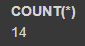

In [ ]:
# Consulta
# Consultar la cantidad de empleados.
#
%%sql


SELECT count(*)
FROM ...

 * sqlite://
(sqlite3.OperationalError) near ".": syntax error
[SQL: SELECT count(*)
FROM ...]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


#### Solución:

Puedes acudir a ella en caso de bloqueo.

In [ ]:
%%sql

SELECT
  COUNT(*)
FROM EMP;

 * sqlite://
Done.


COUNT(*)
14


### **2) Consultar el nombre del departamento con la cantidad de empleados existentes.**

El resultado esperado es:

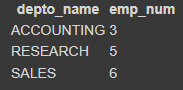

In [ ]:
# Consulta
# Consultar el nombre del departamento con la cantidad de empleados existentes
#
%%sql

SELECT dname, ...
FROM ...
GROUP BY ...

 * sqlite://
(sqlite3.OperationalError) near ".": syntax error
[SQL: SELECT dname, ...
FROM ...
GROUP BY ...]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


#### Solución:

Puedes acudir a ella en caso de bloqueo.

In [ ]:
%%sql

SELECT
  d.dname AS depto_name,
  COUNT(e.empno) AS emp_num
FROM
  EMP e
INNER JOIN
  DEPT d ON e.deptno = d.deptno
GROUP BY
  d.dname;

 * sqlite://
Done.


depto_name,emp_num
ACCOUNTING,3
RESEARCH,5
SALES,6


### **3) Seleccionar el nombre del departamento con el promedio salarial ordenado de mayor a menor.**

Tip: Se puede renombrar una columna de salida con un nuevo nombre, utilizando la clausula AS.

Ej. `SELECT ename AS nomEmp ...`

El resultado esperado es:

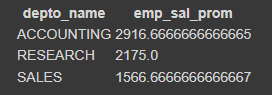

In [ ]:
# Consulta
# Seleccionar el nombre del departamento con el promedio salarial ordenado de mayor a menor.
#
%%sql

SELECT ...
FROM ...
GROUP BY ...
ORDER BY;

 * sqlite://
(sqlite3.OperationalError) near ".": syntax error
[SQL: SELECT ...
FROM ...
GROUP BY ...
ORDER BY;]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


#### Solución:

Puedes acudir a ella en caso de bloqueo.

In [ ]:
%%sql

SELECT
  d.dname AS depto_name,
  AVG(e.sal) AS emp_sal_prom
FROM
  EMP e
INNER JOIN
  DEPT d ON e.deptno = d.deptno
GROUP BY
  d.dname
ORDER BY
  emp_sal_prom DESC;

 * sqlite://
Done.


depto_name,emp_sal_prom
ACCOUNTING,2916.6666666666665
RESEARCH,2175.0
SALES,1566.6666666666667


### **4) Para cada departamento mostrar: código, nombre y el salario más alto. Ordenado de mayor a menor salario**

Tip: Recuerda colocar en el group by, todos los atributos por los que se quiere agrupar (que se coloquen en el select).

El resultado esperado es:

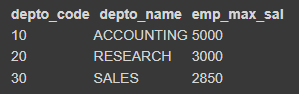

In [ ]:
# Consulta
# Para cada departamento mostrar: código, nombre y el salario más alto.
#
%%sql

SELECT ...
FROM dept natural inner join emp
order by ...;

 * sqlite://
(sqlite3.OperationalError) near ".": syntax error
[SQL: SELECT ...
FROM dept natural inner join emp
order by ...;]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


#### Solución:

Puedes acudir a ella en caso de bloqueo.

In [ ]:
%%sql

SELECT
  d.deptno AS depto_code,
  d.dname AS depto_name,
  MAX(e.sal) AS emp_max_sal
FROM
  EMP e
INNER JOIN
  DEPT d ON e.deptno = d.deptno
GROUP BY
  d.deptno, d.dname
ORDER BY
  emp_max_sal DESC;

 * sqlite://
Done.


depto_code,depto_name,emp_max_sal
10,ACCOUNTING,5000
20,RESEARCH,3000
30,SALES,2850


### **5) Mostrar los números y nombres de los departamentos que tienen al menos 5 empleados.**

Tip: la cláusula "`HAVING`" se utiliza para establecer condiciones sobre grupos de filas generados por la cláusula "`GROUP BY`".

Sintaxis:

```
SELECT columna1, columna2, ...
FROM tabla
GROUP BY columna1, columna2, ...
HAVING condición;
```

El resultado esperado es:

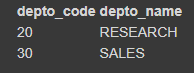

In [ ]:
# Consulta
# Mostrar los números y nombres de los departamentos que tienen al menos 5 empleados.
#
%%sql

SELECT ...
FROM ...
GROUP BY ...
HAVING ...;

 * sqlite://
(sqlite3.OperationalError) near ".": syntax error
[SQL: SELECT ...
FROM ...
GROUP BY ...
HAVING ...;]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


#### Solución:

Puedes acudir a ella en caso de bloqueo.

In [ ]:
%%sql

SELECT
  d.deptno AS depto_code,
  d.dname AS depto_name
FROM
  EMP e
INNER JOIN
  DEPT d ON e.deptno = d.deptno
GROUP BY
  d.deptno , d.dname
HAVING
  COUNT(e.empno) >= 5;

 * sqlite://
Done.


depto_code,depto_name
20,RESEARCH
30,SALES


### **6) Determinar los números y nombres de los empleados que ganan más dinero que su respectivo jefe**

Tip: se puede hacer join de una tabla consigo misma. Para eso es muy útil definir alias de la tabla. En este caso se podrían utilizan alias "e1" y "e2" para referirse a dos instancias diferentes de la tabla "EMP".

El resultado esperado es:

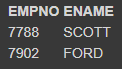

In [ ]:
# Consulta
# Determinar los números y nombres de los empleados que ganan más dinero que su respectivo jefe
#
%%sql

SELECT ...
FROM emp e1 inner join emp e2 on ...;

 * sqlite://
(sqlite3.OperationalError) near ".": syntax error
[SQL: SELECT ...
FROM emp e1 inner join emp e2 on ...;]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


#### Solución:

Puedes acudir a ella en caso de bloqueo.

In [ ]:
%%sql

SELECT
  e.empno,
  e.ename
FROM
  EMP e
INNER JOIN
  EMP m ON e.mgr = m.empno
WHERE
  e.sal > m.sal;

 * sqlite://
Done.


EMPNO,ENAME
7788,SCOTT
7902,FORD


### 7) Determinar los números y nombres de los departamentos en donde los empleados ganan más de 800.

El resultado esperado es:

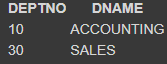

In [ ]:
# Consulta
# Determinar los números y nombres de los departamentos en donde la suma de los salarios de sus empleados ganan más de 8.000 y menos de 10.000
#
%%sql

SELECT ...
FROM ...
WHERE  ( ....)

 * sqlite://
(sqlite3.OperationalError) near ".": syntax error
[SQL: SELECT ...
FROM ...
WHERE  ( ....)]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


#### Solución:

Puedes acudir a ella en caso de bloqueo.

In [ ]:
%%sql

SELECT
  d.deptno,
  d.dname
FROM
  EMP e INNER JOIN DEPT d ON e.deptno = d.deptno
GROUP BY
  d.deptno,
  d.dname
HAVING
    sum(e.sal) > 8000 and sum(e.sal) <10000;

 * sqlite://
Done.


DEPTNO,DNAME
10,ACCOUNTING
30,SALES


### **8) Determinar los números y nombres de los departamentos en donde todos los empleados ganan mas de 950 y existe al menos un jefe que gana más de 1350.**

El resultado esperado es:

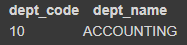

In [ ]:
# Consulta
# Determinar los números y nombres de los departamentos en donde todos los empleados ganan más de 950
# y existe al menos un jefe que gana más de 1350
#
%%sql

SELECT
FROM ...
WHERE not exists ( ....)

 * sqlite://
(sqlite3.OperationalError) near "FROM": syntax error
[SQL: SELECT
FROM ...
WHERE not exists ( ....)]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


#### Solución:

Puedes acudir a ella en caso de bloqueo.

In [ ]:
%%sql

SELECT
    d.deptno AS dept_code,
    d.dname AS dept_name
FROM
    DEPT d
WHERE
    NOT EXISTS (
        SELECT 1
        FROM EMP e
        WHERE e.deptno = d.deptno AND e.sal <= 950
    )
    AND EXISTS (
        SELECT 1
        FROM EMP m
        WHERE m.deptno = d.deptno AND m.sal > 1350
    );

UsageError: Cell magic `%%sql` not found.
